## Exploratory Data Analysis of the Income Census Dataset

In [70]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# load data
income_census = pd.read_csv("income_census.csv")
income_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Understanding the variables

In [72]:
variables = pd.DataFrame(columns=['Variables','Number of unique values','Values'])

for i, var in enumerate(income_census.columns):
    variables.loc[i] = [var, income_census[var].nunique(), income_census[var].unique()]

variables.set_index('Variables')

                         

,Number of unique values,Values
Variables,,
age,73,"[90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 3..."
workclass,9,"[?, Private, State-gov, Federal-gov, Self-emp-..."
fnlwgt,21648,"[77053, 132870, 186061, 140359, 264663, 216864..."
education,16,"[HS-grad, Some-college, 7th-8th, 10th, Doctora..."
education.num,16,"[9, 10, 4, 6, 16, 15, 13, 14, 7, 12, 11, 2, 3,..."
marital.status,7,"[Widowed, Divorced, Separated, Never-married, ..."
occupation,15,"[?, Exec-managerial, Machine-op-inspct, Prof-s..."
relationship,6,"[Not-in-family, Unmarried, Own-child, Other-re..."
race,5,"[White, Black, Asian-Pac-Islander, Other, Amer..."


### Replacing all the "?" characters as missing values

In [73]:
income_census.loc[income_census.workclass == "?", "workclass"] = np.nan
income_census.loc[income_census.occupation == "?", "occupation"] = np.nan
income_census.loc[income_census["native.country"] == "?", "native.country"] = np.nan


In [74]:
# basic information about dataset
income_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Converting all the non-numeric variables to categorical (normimal and ordinal)

In [75]:
# categorical normal variables
income_census['workclass'] = income_census['workclass'].astype('category')
income_census['marital.status'] = income_census['marital.status'].astype('category')
income_census['occupation'] = income_census['occupation'].astype('category')
income_census['relationship'] = income_census['relationship'].astype('category')
income_census['race'] = income_census['race'].astype('category')
income_census['sex'] = income_census['sex'].astype('category')
income_census['native.country'] = income_census['native.country'].astype('category')

# categorical ordinal variables
income_census['income'] = income_census['income'].astype('category')
# setting the the order of income variable
income_census['income'] = income_census['income'].cat.set_categories(new_categories=['<=50K','>50K'],
                                                                     ordered=True)
income_census['education'] = income_census['education'].astype('category')

In [76]:
# education vs education.num order
edu_num = pd.DataFrame({'edu_uniq':income_census['education'].unique(), 
                        'num_uniq':income_census['education.num'].unique()})
edu_num.sort_values('num_uniq', ascending=True).set_index('edu_uniq')

,num_uniq
edu_uniq,
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


In [77]:
# list of the order of education
education_order = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college',
                   'Assoc-voc','Assoc-acdm','Bachelors','Masters','Prof-school','Doctorate']
# setting the order of the education variable
income_census['education'] = income_census['education'].cat.set_categories(new_categories=education_order,
                                                                           ordered=True)

In [78]:
# head of the processed dataset
income_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [79]:
income_census.shape

(32561, 15)

In [80]:
# checking the updated datatypes
income_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      30718 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  31978 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


### Univariate exploration

#### Age:

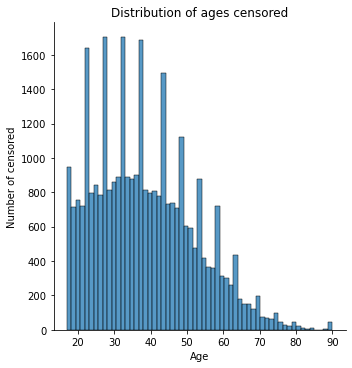

In [81]:
sns.displot(income_census['age'])
plt.ylabel('Number of censored')
plt.xlabel('Age')
plt.title('Distribution of ages censored')
plt.show()

In [82]:
# range of ages
min_age = income_census['age'].min()
min_age

17

In [83]:
max_age = income_census['age'].max()
max_age

90

The ages of people censored range from from 17 to 90. The density is higest between 26 and 56. Therefore, we could categorize the age variable into 3 groups for clarity in the analysis. That is 17-25, 26-55, and 56+

In [84]:
# creating age groups
ranges = [16, 25, 55, np.inf]
groups = ['17-25','26-55','56+']

# creating the age group column
income_census['age_group'] = pd.cut(income_census['age'], bins=ranges, labels=groups)
income_census['age_group'].unique()

['56+', '26-55', '17-25']
Categories (3, object): ['17-25' < '26-55' < '56+']

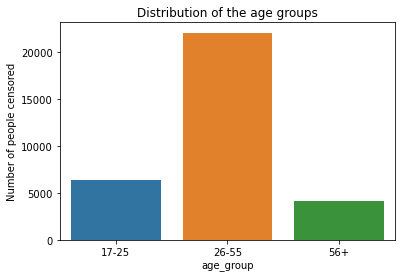

In [85]:
# graphical display of the age groups
sns.countplot(x='age_group', data=income_census)
plt.ylabel('Number of people censored')
plt.title('Distribution of the age groups')
plt.show()

In [86]:
# determining the proportions of the age groups
round(income_census['age_group'].value_counts(normalize=True) * 100, 2)

26-55    67.75
17-25    19.69
56+      12.56
Name: age_group, dtype: float64

`67.75%` of the people censored were in the '26-55' age group, constituting the highest proportion.

#### Workclass:

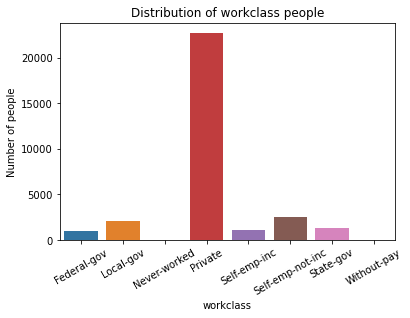

In [87]:
# distribution of the workclass variable
sns.countplot(x='workclass', data=income_census)
plt.xticks(rotation=30)
plt.ylabel('Number of people')
plt.title('Distribution of workclass people')
plt.show()

In [88]:
# determining the proportions of the work classes
round(income_census['workclass'].value_counts(normalize=True, dropna=False) * 100, 2)

Private             69.70
Self-emp-not-inc     7.80
Local-gov            6.43
NaN                  5.64
State-gov            3.99
Self-emp-inc         3.43
Federal-gov          2.95
Without-pay          0.04
Never-worked         0.02
Name: workclass, dtype: float64

`69.70%` of people censored were of the 'Private' workclass, which is the highest proportion.

#### Education:

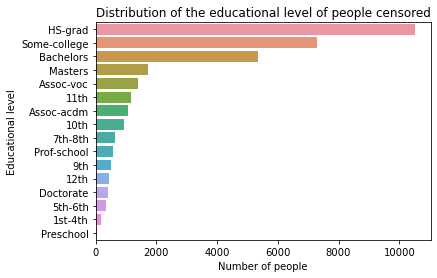

In [89]:
# distribution of the education variable
sns.countplot(y='education', data=income_census, order=income_census['education'].value_counts().index)
plt.xlabel('Number of people')
plt.ylabel('Educational level')
plt.title('Distribution of the educational level of people censored')
plt.show()

In [90]:
# determining the protortions of the education level
round(income_census['education'].value_counts(normalize=True) * 100, 2)

HS-grad         32.25
Some-college    22.39
Bachelors       16.45
Masters          5.29
Assoc-voc        4.24
11th             3.61
Assoc-acdm       3.28
10th             2.87
7th-8th          1.98
Prof-school      1.77
9th              1.58
12th             1.33
Doctorate        1.27
5th-6th          1.02
1st-4th          0.52
Preschool        0.16
Name: education, dtype: float64

The top three educational level of people censored were HS-grad(`32.25%`), Some-college(`22.39%`) , and Bachelors(`16.45`). These 3 constitute over `71%` of the people censored, with HS-grad being the highest.

#### Marital status:

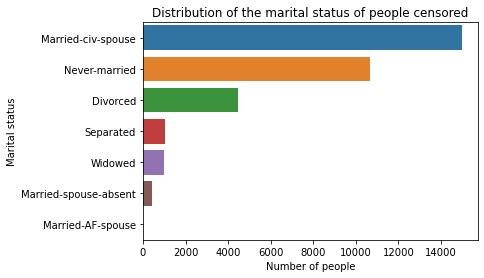

In [91]:
# distribution of the education variable
sns.countplot(y='marital.status', data=income_census, order=income_census['marital.status'].value_counts().index)
plt.xlabel('Number of people')
plt.ylabel('Marital status')
plt.title('Distribution of the marital status of people censored')
plt.show()

In [92]:
# determining the proportions of the marital status
round(income_census['marital.status'].value_counts(normalize=True) * 100, 2)

Married-civ-spouse       45.99
Never-married            32.81
Divorced                 13.65
Separated                 3.15
Widowed                   3.05
Married-spouse-absent     1.28
Married-AF-spouse         0.07
Name: marital.status, dtype: float64

Proportionately, the top three marital status of people censored are Married-civ-spouse(`45.99%`), Never-married(`32.81%`), and Divorced(`13.81%`). These 3 add up to over `92%` of the people censored, with Married-civ-spouse being the highest.

#### Occupation:

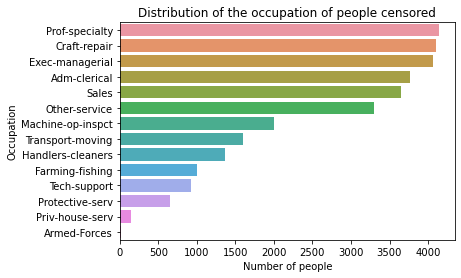

In [93]:
# distribution of the occupation variable
sns.countplot(y='occupation', data=income_census, order=income_census['occupation'].value_counts().index)
plt.xlabel('Number of people')
plt.ylabel('Occupation')
plt.title('Distribution of the occupation of people censored')
plt.show()

In [94]:
# determining the proportions of the occupation
round(income_census['occupation'].value_counts(normalize=True, dropna=False) * 100, 2)

Prof-specialty       12.71
Craft-repair         12.59
Exec-managerial      12.49
Adm-clerical         11.58
Sales                11.21
Other-service        10.12
Machine-op-inspct     6.15
NaN                   5.66
Transport-moving      4.90
Handlers-cleaners     4.21
Farming-fishing       3.05
Tech-support          2.85
Protective-serv       1.99
Priv-house-serv       0.46
Armed-Forces          0.03
Name: occupation, dtype: float64

#### Relationship:

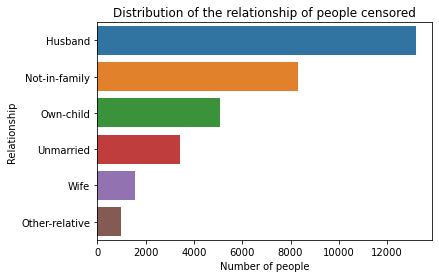

In [95]:
# distribution of the relationship variable
sns.countplot(y='relationship', data=income_census, order=income_census['relationship'].value_counts().index)
plt.xlabel('Number of people')
plt.ylabel('Relationship')
plt.title('Distribution of the relationship of people censored')
plt.show()

In [96]:
# determining the proportions of relationship
round(income_census['relationship'].value_counts(normalize=True) * 100, 2)

Husband           40.52
Not-in-family     25.51
Own-child         15.56
Unmarried         10.58
Wife               4.82
Other-relative     3.01
Name: relationship, dtype: float64

#### Race:

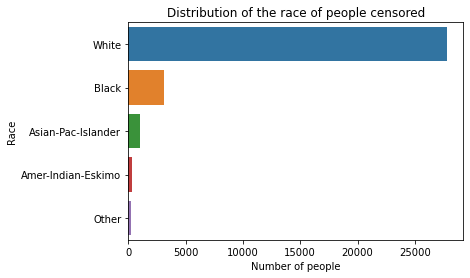

In [97]:
# distribution of the race variable
sns.countplot(y='race', data=income_census, order=income_census['race'].value_counts().index)
plt.xlabel('Number of people')
plt.ylabel('Race')
plt.title('Distribution of the race of people censored')
plt.show()

In [98]:
# determining the proportion of the race censored
round(income_census['race'].value_counts(normalize=True) * 100, 2)

White                 85.43
Black                  9.59
Asian-Pac-Islander     3.19
Amer-Indian-Eskimo     0.96
Other                  0.83
Name: race, dtype: float64

#### Sex:

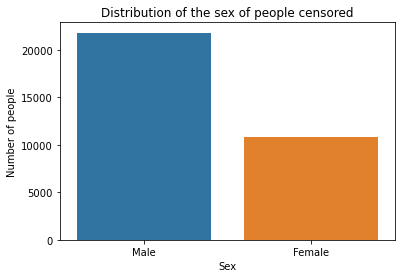

In [99]:
# distribution of the sex variable
sns.countplot(x='sex', data=income_census, order=income_census['sex'].value_counts().index)
plt.ylabel('Number of people')
plt.xlabel('Sex')
plt.title('Distribution of the sex of people censored')
plt.show()

In [100]:
# determining the proportions of sex
round(income_census['sex'].value_counts(normalize=True) * 100, 2)

Male      66.92
Female    33.08
Name: sex, dtype: float64

#### Native country:

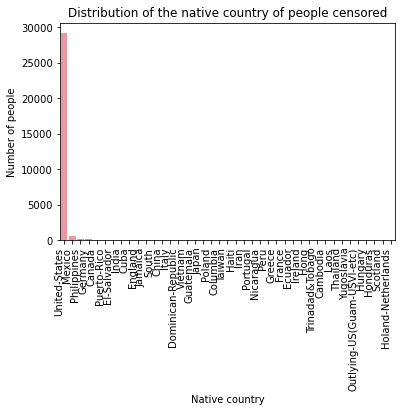

In [101]:
# distribution of the native.country variable
sns.countplot(x='native.country', data=income_census, order=income_census['native.country'].value_counts().index)
plt.ylabel('Number of people')
plt.xlabel('Native country')
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of the native country of people censored')
plt.show()

In [102]:
# determining the proportions of native country
round(income_census['native.country'].value_counts(normalize=True, dropna=False) * 100, 2)

United-States                 89.59
Mexico                         1.97
NaN                            1.79
Philippines                    0.61
Germany                        0.42
Canada                         0.37
Puerto-Rico                    0.35
El-Salvador                    0.33
India                          0.31
Cuba                           0.29
England                        0.28
Jamaica                        0.25
South                          0.25
China                          0.23
Italy                          0.22
Dominican-Republic             0.21
Vietnam                        0.21
Guatemala                      0.20
Japan                          0.19
Poland                         0.18
Columbia                       0.18
Taiwan                         0.16
Haiti                          0.14
Iran                           0.13
Portugal                       0.11
Nicaragua                      0.10
Peru                           0.10
France                      

Over `91%` of people censored were native Americans and Mexicans, with `89.59%` being native Americans.

#### Income:

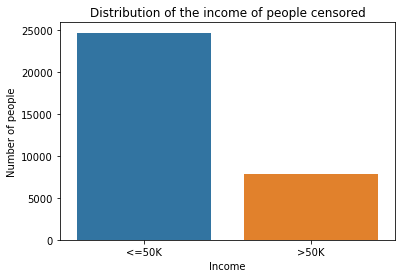

In [103]:
# distribution of the income variable
sns.countplot(x='income', data=income_census, order=income_census['income'].value_counts().index)
plt.ylabel('Number of people')
plt.xlabel('Income')
plt.title('Distribution of the income of people censored')
plt.show()

In [104]:
# determining the proportions of income
round(income_census['income'].value_counts(normalize=True, dropna=False) * 100, 2)

<=50K    75.92
>50K     24.08
Name: income, dtype: float64

`75.92%` of people had income <=50K whereas `24.08%` had income >50K.

### Bivariate exploration

#### income vs hours_per_week:

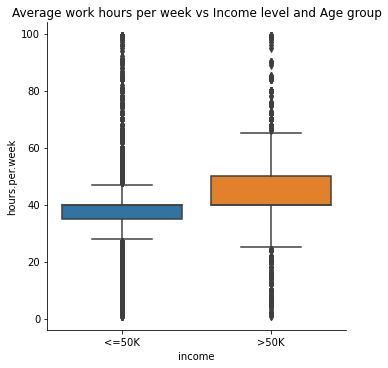

In [138]:
# distribution of the income across the various age groups
sns.catplot(x='income', y='hours.per.week', data=income_census, kind='box')
plt.title('Average work hours per week vs Income level and Age group')
plt.show()

#### income and age_group vs hours_per week

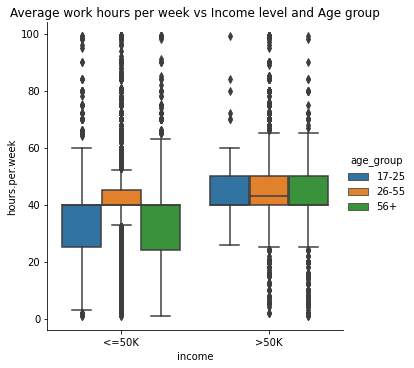

In [139]:
# distribution of the income across the various age groups
sns.catplot(x='income', y='hours.per.week', data=income_census, kind='box', hue='age_group')
plt.title('Average work hours per week vs Income level and Age group')
plt.show()